In [1005]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("profiles.csv")

In [1006]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

In [1007]:
#a few functions do look at distributions

#plot histogram
def hist(col):
  plt.hist(df[col].dropna())
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.show()

#plot distribution
def dist(col,xmin=None,xmax=None):
  count=df[col].value_counts().sort_index()
  plt.plot(list(count.keys()),list(count.values))
  if not (xmin is None) and not (xmax is None):
    plt.xlim(xmin,xmax)
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

#plot distribution by sex
def dist_bysex(col,xmin=None,xmax=None):
  countm=df.loc[df['sex']=='m'][col].value_counts().sort_index()
  countm=countm.multiply(1/countm.sum())
  countf=df.loc[df['sex']=='f'][col].value_counts().sort_index()
  countf=countf.multiply(1/countf.sum())
  plt.plot(list(countm.keys()),list(countm.values),color='blue',label='male')
  plt.plot(list(countf.keys()),list(countf.values),color='red',label='female')
  if not (xmin is None) and not (xmax is None):
    plt.xlim(xmin,xmax)
  plt.xlabel(col)
  plt.ylabel('freq')
  plt.legend()
  plt.show()
  
#plot scatter of first 2 features and full correlation matrix of all features given
def explore(flist):
    df2=df[flist]
    plt.scatter(df2[flist[0]],df2[flist[1]], alpha=0.01)
    plt.show()
    print(df2.corr())  

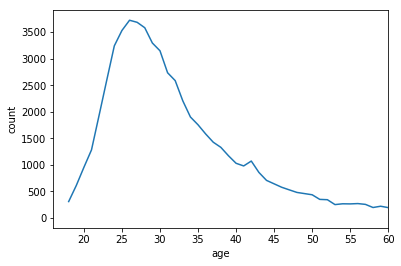

In [1008]:
dist('age',16,60)

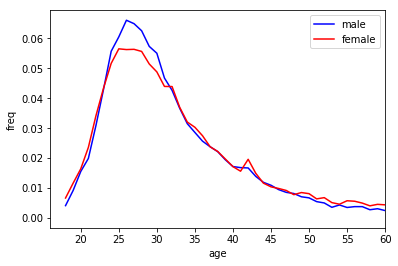

In [1009]:
dist_bysex('age',16,60)

In [1010]:
print(df.body_type.value_counts())
body_map = {"rather not say":np.nan,"average":5,"fit":4,"athletic":4,"thin":3,"curvy":6,"a little extra":7,"skinny":2,
                "full figured":7,"overweight":8,"jacked":4,"used up":1}
print((sorted(body_map.items(), key=lambda x: x[1])))
df["body_n"]=df.body_type.map(body_map)
print(df.body_type.count())

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
[('used up', 1), ('skinny', 2), ('thin', 3), ('athletic', 4), ('jacked', 4), ('fit', 4), ('average', 5), ('curvy', 6), ('a little extra', 7), ('overweight', 8), ('rather not say', nan), ('full figured', 7)]
54650


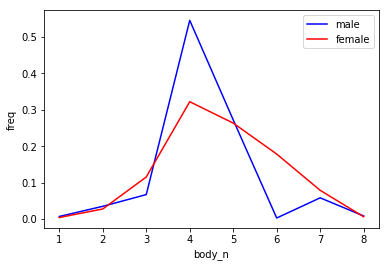

In [1011]:
dist_bysex('body_n')

In [1012]:
print(df.diet.value_counts())
diet_map={"mostly anything":0,"anything":0,"strictly anything":0,"mostly vegetarian":1,"mostly other":1,
          "strictly vegetarian":2,"vegetarian":2,"strictly other":2,"mostly vegan":1,"other":2,
          "strictly vegan":2,"vegan":2,"mostly kosher":1,"mostly halal":1,"strictly kosher":2,
          "strictly halal":2,"kosher":2,"halal":2}
print(df.diet.count())
df['diet_n']=df.diet.map(diet_map)

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
halal                     11
kosher                    11
Name: diet, dtype: int64
35551


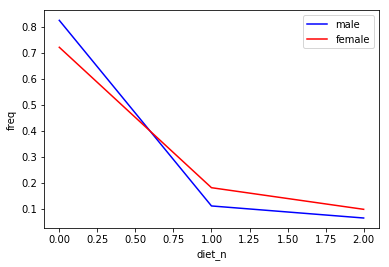

In [1013]:
dist_bysex('diet_n')

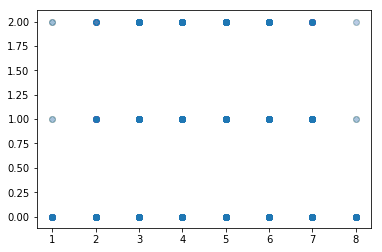

          body_n    diet_n
body_n  1.000000 -0.020344
diet_n -0.020344  1.000000


In [1014]:
explore(['body_n','diet_n'])

In [1015]:
print(df.drinks.value_counts())
drinks_map={"socially":2,"rarely":1,"often":3,"not at all":0,"very often":4,"desperately":5}
df['drinks_n']=df.drinks.map(drinks_map)

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64


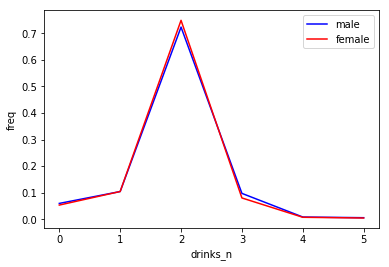

In [1016]:
dist_bysex('drinks_n')

In [1017]:
print(df.drugs.value_counts())
drugs_map={"never":0,"sometimes":1,"often":2}
user_map={"never":0,"sometimes":1,"often":1}
df['drugs_n']=df.drugs.map(drugs_map)
df['user']=df.drugs.map(user_map)
#explore(['drugs_n','drinks_n','diet_n','body_n'])

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64


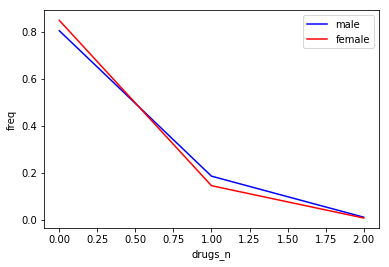

In [1018]:
dist_bysex('drugs_n')

In [1019]:
print(df.smokes.value_counts())
print(df.smokes.count())
smokes_map={"no":0,"sometimes":1,"when drinking":1,"yes":2,"trying to quit":1}
df['smokes_n']=df.smokes.map(smokes_map)

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64
54434


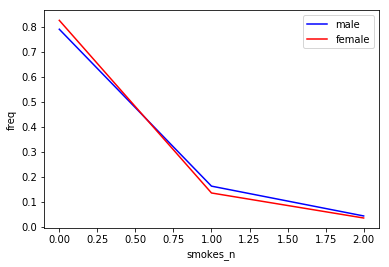

In [1020]:
dist_bysex('smokes_n')

In [1021]:
print(df.religion.value_counts())
print(df.religion.count())
religion_map={
  "agnosticism":0,
  "other":2,
  "agnosticism but not too serious about it":0,
  "agnosticism and laughing about it":0,
  "catholicism but not too serious about it":1,
  "atheism":0,
  "other and laughing about it":0,
  "atheism and laughing about it":0,
  "christianity":2,
  "christianity but not too serious about it":1,
  "other but not too serious about it":1,
  "judaism but not too serious about it":1,
  "atheism but not too serious about it":0,
  "catholicism":2,
  "christianity and somewhat serious about it":2,
  "atheism and somewhat serious about it":0,
  "other and somewhat serious about it":2,
  "catholicism and laughing about it":0,
  "judaism and laughing about it":0,
  "buddhism but not too serious about it":1,
  "agnosticism and somewhat serious about it":0,
  "judaism":2,
  "christianity and very serious about it":2,
  "atheism and very serious about it":0,
  "catholicism and somewhat serious about it":2,
  "other and very serious about it":2,
  "buddhism and laughing about it":0,
  "buddhism":2,
  "christianity and laughing about it":0,
  "buddhism and somewhat serious about it":2,
  "agnosticism and very serious about it":1,
  "judaism and somewhat serious about it":2,
  "hinduism but not too serious about it":1,
  "hinduism":2,
  "catholicism and very serious about it":2,
  "buddhism and very serious about it":2,
  "hinduism and somewhat serious about it":2,
  "islam":2,
  "hinduism and laughing about it":0,
  "islam but not too serious about it":1,
  "islam and somewhat serious about it":2,
  "judaism and very serious about it":2,
  "islam and laughing about it":0,
  "hinduism and very serious about it":2,
  "islam and very serious about it":2}
df['religion_n']=df.religion.map(religion_map)
#df['religion_b']=df.religion_n.dropna().where(df.religion_n.dropna()==0,1)
#df['religion_b2']=df.religion_n.dropna().apply(lambda x: 1 if x>1 else 0)
df['religion_b']=(df.religion_n.dropna()>0).astype(int)
df['religion_b2']=(df.religion_n.dropna()>1).astype(int)
print(df.religion_n.value_counts())
print(df.religion_b.value_counts())
print(df.religion_b2.value_counts())

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

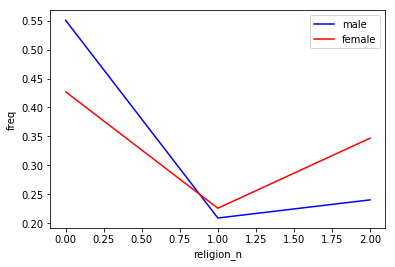

In [1022]:
dist_bysex('religion_n')

In [1023]:
print(df.pets.value_counts())
print(df.pets.count())
pets_map={
  "likes dogs and likes cats":0,
  "likes dogs":0,
  "likes dogs and has cats":1,
  "has dogs":1,
  "has dogs and likes cats":1,
  "likes dogs and dislikes cats":0,
  "has dogs and has cats":1,
  "has cats":1,
  "likes cats":1,
  "has dogs and dislikes cats":1,
  "dislikes dogs and likes cats":0,
  "dislikes dogs and dislikes cats":0,
  "dislikes cats":0,
  "dislikes dogs and has cats":1,
  "dislikes dogs":0
}
df['pets_n']=df.pets.map(pets_map)
print(df.pets_n.value_counts())

likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64
40025
0.0    24669
1.0    15356
Name: pets_n, dtype: int64


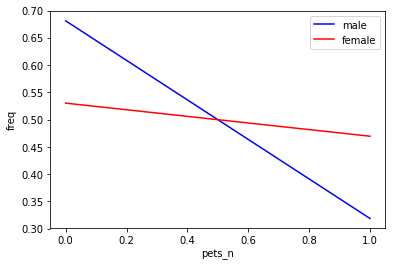

In [1024]:
dist_bysex('pets_n')

In [1025]:
print(df.education.value_counts())
education_map={"graduated from college/university":4,"graduated from masters program":6,
               "working on college/university":3,"working on masters program":5,
               "graduated from two-year college":2,"graduated from high school":0,
               "graduated from ph.d program":8,"graduated from law school":6,
               "working on two-year college":1,"dropped out of college/university":2,
               "working on ph.d program":7,"college/university":4,"graduated from space camp":0,
               "dropped out of space camp":0,"graduated from med school":6,
               "working on space camp":0,"working on law school":5,"two-year college":2,
               "working on med school":5,"dropped out of two-year college":1,
               "dropped out of masters program":5,"masters program":6,
               "dropped out of ph.d program":7,"dropped out of high school":-1,
               "high school":0,"working on high school":-1,"space camp":0,
               "ph.d program":8,"law school":6,"dropped out of law school":5,
               "dropped out of med school":5,"med school":6}
df['education_n']=df.education.map(education_map)
df['nocollege']=df.education_n.dropna().apply(lambda x: 1 if x<4 else 0)
print(df.education_n.value_counts())
print(df.nocollege.value_counts())

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

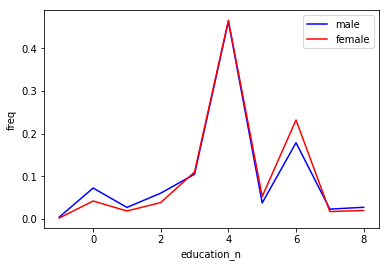

In [1026]:
dist_bysex('education_n')

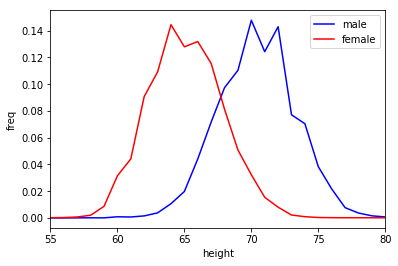

In [1027]:
#clean up height from unreasonable values
df.height=df.height.where(df.height>10)
dist_bysex('height',55,80)


In [1028]:
print(df.ethnicity.value_counts())


white                                                                                                      32831
asian                                                                                                       6134
hispanic / latin                                                                                            2823
black                                                                                                       2008
other                                                                                                       1706
hispanic / latin, white                                                                                     1301
indian                                                                                                      1077
asian, white                                                                                                 811
white, other                                                                                    

In [1029]:
print(df.income.value_counts().sort_index())
print(df.income.count())

-1          48442
 20000       2952
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 80000       1111
 100000      1621
 150000       631
 250000       149
 500000        48
 1000000      521
Name: income, dtype: int64
59946


In [1030]:
print(df.job.value_counts())
print(df.job.count())

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64
51748


In [1031]:
print(df.location.value_counts())

san francisco, california              31064
oakland, california                     7214
berkeley, california                    4212
san mateo, california                   1331
palo alto, california                   1064
alameda, california                      910
san rafael, california                   755
hayward, california                      747
emeryville, california                   738
redwood city, california                 693
daly city, california                    681
san leandro, california                  651
walnut creek, california                 644
vallejo, california                      558
menlo park, california                   479
richmond, california                     424
south san francisco, california          416
mountain view, california                384
novato, california                       369
burlingame, california                   361
pleasant hill, california                347
castro valley, california                345
stanford, 

In [1032]:
print(df.offspring.value_counts())
print(df.offspring.count())

doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64
24385


In [1033]:
print(df.orientation.value_counts())
print(df.orientation.count())

orientation_map={'straight':0,'gay':1,'bisexual':2}
df['orientation_n']=df.orientation.map(orientation_map)
nostraight_map={'straight':0,'gay':1,'bisexual':1}
df['nostraight']=df.orientation.map(nostraight_map)
df['gay']=df.orientation_n==1
print(df.orientation_n.value_counts())
print(df.nostraight.value_counts())
print(df.gay.value_counts())


straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64
59946
0    51606
1     5573
2     2767
Name: orientation_n, dtype: int64
0    51606
1     8340
Name: nostraight, dtype: int64
False    54373
True      5573
Name: gay, dtype: int64


In [1034]:
print(df.sign.value_counts())

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

In [1035]:
print(df.speaks.value_counts())

english                                                                                             21828
english (fluently)                                                                                   6628
english (fluently), spanish (poorly)                                                                 2059
english (fluently), spanish (okay)                                                                   1917
english (fluently), spanish (fluently)                                                               1288
english, spanish                                                                                      859
english (fluently), french (poorly)                                                                   756
english, spanish (okay)                                                                               655
english, spanish (poorly)                                                                             609
english (fluently), chinese (fluently)        

In [1036]:
print(df.status.value_counts())

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64


In [1037]:
#make sex a numeric value to simplify the use in regression/classification
df['sex_n']=(df['sex']=='f').astype(int)

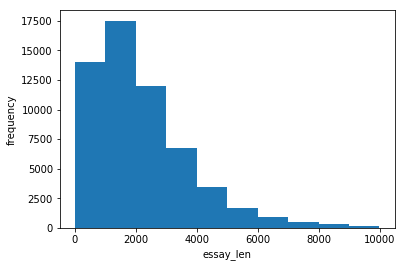

In [1038]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
df["essay_len"] = all_essays.apply(lambda x: len(x))
df['all_essays']=all_essays
#remove empty/toolong essays
col=['all_essays','essay_len']
l=df['essay_len']
df[col] = df[col].where((l>9) & (l<10000))
del all_essays,l

hist('essay_len')


In [1039]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import HashingVectorizer
cv=CountVectorizer(binary=False)
cv_fit=cv.fit_transform(df.all_essays.fillna(''))

#explore top total word counts
wc=dict(zip(cv.get_feature_names(),cv_fit.sum(axis=0).reshape(-1,1).tolist()))
wc=sorted(wc.items(), key=lambda x: x[1], reverse=True)
print(wc[0:200])

[('br', [865855]), ('and', [699427]), ('the', [614310]), ('to', [578429]), ('my', [352665]), ('of', [342811]), ('in', [288523]), ('you', [213534]), ('that', [173993]), ('it', [173487]), ('with', [171757]), ('for', [165849]), ('is', [143494]), ('have', [136486]), ('like', [131740]), ('or', [127949]), ('on', [127288]), ('but', [126820]), ('me', [126398]), ('love', [117928]), ('am', [116176]), ('at', [112655]), ('be', [96328]), ('not', [96309]), ('out', [91636]), ('are', [88228]), ('good', [87836]), ('music', [83511]), ('as', [83211]), ('friends', [83035]), ('if', [79616]), ('can', [78483]), ('people', [76698]), ('interests', [76411]), ('class', [75552]), ('href', [75130]), ('about', [72687]), ('ilink', [72130]), ('life', [71858]), ('time', [69711]), ('all', [68330]), ('so', [66015]), ('just', [65815]), ('things', [63484]), ('what', [63328]), ('food', [63318]), ('do', [61570]), ('an', [57729]), ('new', [57614]), ('this', [57308]), ('up', [57251]), ('don', [53269]), ('really', [52797]), ('

In [1040]:
#first word is used as column name
def add_wordcount(words):
  col=np.zeros((df.shape[0],1))
  for word in words:
    col=np.add(col,(cv_fit[:,cv.vocabulary_.get(word)]).toarray())
  df[words[0]]=col
  
  
add_wordcount(['watching','watch','tv','movies','movie','shows'])  
add_wordcount(['reading','book','read'])  
  

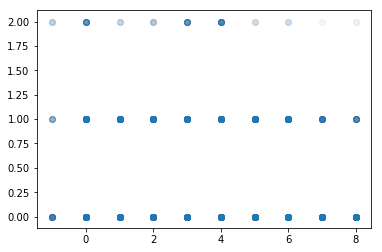

               education_n   drugs_n  drinks_n  smokes_n    diet_n    body_n  \
education_n       1.000000 -0.155194  0.026015 -0.248783  0.012280 -0.091195   
drugs_n          -0.155194  1.000000  0.218327  0.357025  0.056474 -0.023082   
drinks_n          0.026015  0.218327  1.000000  0.152255 -0.082090 -0.046775   
smokes_n         -0.248783  0.357025  0.152255  1.000000 -0.009614  0.035839   
diet_n            0.012280  0.056474 -0.082090 -0.009614  1.000000 -0.020344   
body_n           -0.091195 -0.023082 -0.046775  0.035839 -0.020344  1.000000   
religion_n       -0.026954 -0.170933 -0.123146 -0.044028  0.021962  0.057814   
pets_n           -0.077652  0.013104 -0.034448  0.053452  0.048612  0.078482   
essay_len         0.081467  0.057171 -0.036852 -0.080021  0.050459  0.042293   
watching          0.008630 -0.021140 -0.030746 -0.056043 -0.027019  0.079880   
reading           0.068957 -0.000837 -0.026086 -0.055550  0.021016  0.043858   
orientation_n    -0.045529  0.131295 -0.

In [1041]:
#look at the correlations for ideas...
explore(['education_n','drugs_n','drinks_n','smokes_n','diet_n','body_n','religion_n','pets_n','essay_len',
         'watching','reading','orientation_n','sex_n','user'])


In [1061]:
#create geenral functions to try different features/models
from sklearn.preprocessing import scale, minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score,confusion_matrix, \
  recall_score, precision_score, f1_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.exceptions import DataConversionWarning
import warnings
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#generalized classificator/regressor 
def classify(df,x_cols,y_col,model,k=25,binry=True,vectorizer='',showscatter=False):
  #remove rows with empty fields
  dff=df[x_cols+[y_col]].dropna()
  #only one x column needs special handling
  if len(x_cols)==1:
    x_cols=x_cols[0]
  
  #scale, mostly use normal
  warnings.filterwarnings(action='ignore', category=DataConversionWarning)
  if vectorizer=='':
    if model=='nb':
      #data has to be non-negative
  #    X=dff[x_cols]
      #0-1 by default
      X=minmax_scale(dff[x_cols], axis=0)
    elif model=='lr':
      #no point of scaling for linear regression
      X=dff[x_cols]
    else:
      X=scale(dff[x_cols], axis=0)
  else:
    X=dff[x_cols]
  warnings.filterwarnings(action='default', category=DataConversionWarning)
#  if len(x_cols)==1:
#    X=X.reshape(-1, 1)

  #split
  train_data, test_data, train_labels, test_labels = train_test_split(X, dff[y_col], 
                                                                      test_size = 0.2, random_state = 0)
  
  #reshape for regression with one predictor, unless it is supposed to be vectorized
  if len(train_data.shape) < 2 and vectorizer=='':
      train_data = np.array(train_data).reshape(-1,1)
      test_data = np.array(test_data).reshape(-1,1)

  #include transformation time
  t0=time.time()
  
  #transform/vectorize if required
  if vectorizer!='':
    stopwords=['br','href','ilink']
    if vectorizer=='count':
      cv=CountVectorizer(binary=False, ngram_range=(1,1),stop_words=stopwords)
    else:
      cv=TfidfVectorizer(binary=False, ngram_range=(1,1),stop_words=stopwords)
    cv.fit(train_data) 
    train_data = cv.transform(train_data)
    test_data = cv.transform(test_data)
  
  #create classifier
  if model=='svc':
    classifier = SVC(kernel='rbf', gamma='scale')  
  elif model=='knn':
    if isinstance(k,range):
      chart_knn(train_data, test_data, train_labels, test_labels, k, name=y_col)
      return
    else:
      classifier = KNeighborsClassifier(n_neighbors=k)
  elif model=='lr':
    classifier=LinearRegression()
  elif model=='nb':
    classifier=MultinomialNB()
  else:
    print('ERROR: unknown model')
    return

  #run
  classifier.fit(train_data, train_labels)
  predictions = classifier.predict(test_data)
  #if lr used for binary classification, round predictions
  if model=='lr' and binry:
    predictions=(predictions>0.5)
  #metrics
  print('\ndata       ',(x_cols if isinstance(x_cols, str) else ",".join(x_cols)) )
  print('attributes:',train_data.shape[1])
  print('target:    ',y_col)
  print('samples:   ',dff.shape[0])
  print('model:     ',model,('k='+str(k) if model=='knn' else ''))
  if binry:
    print('prevalence:       ',round(np.sum(dff[y_col]>0)/dff.shape[0],4))
    print('accuracy:         ',round(accuracy_score(test_labels, predictions),4))
    print('balanced accuracy:',round(balanced_accuracy_score(test_labels, predictions,adjusted=True),4))
    print('precision:        ',round(precision_score(test_labels, predictions),4))
    #print(recall_score(test_labels, predictions,pos_label=0))
    print('recall:           ',round(recall_score(test_labels, predictions),4))
    print('f1-score:         ',round(f1_score(test_labels, predictions),4))
    print('confusion matrix  :')
    print(confusion_matrix(test_labels, predictions))
  else:
    print('r2:               ',round(r2_score(test_labels, predictions),4))
  print('time:             ',round(time.time()-t0,2))
  
  if showscatter:
    xyscatter(test_labels,predictions,y_col)
  
  return

#function to chart accuracy v k for knn
def chart_knn(train_data, test_data, train_labels, test_labels, krange, name=''):
  accuracy=[]
  recall=[]
  f1=[]
  for k in krange:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    predictions = classifier.predict(test_data)
    accuracy.append(accuracy_score(test_labels, predictions))
    recall.append(recall_score(test_labels, predictions))
    f1.append(f1_score(test_labels, predictions))
  plt.plot(krange,accuracy,color='red',label='accuracy')
  plt.plot(krange,recall,color='blue',label='recall')
  plt.plot(krange,f1,color='green',label='f1')
  plt.xlabel('k')
  plt.title(name)
  plt.legend()
  plt.show()
  return

def xyscatter(test_labels,predictions,name=''):
  plt.scatter(test_labels,predictions,alpha=0.1)
  plt.xlabel('actual')
  plt.ylabel('predicted')
  plt.title(name)
  plt.show()

#function to print features with highest weights
def best_features(cl):
  cw = sorted(list(zip(classifier.coef_[0], cv.get_feature_names())), reverse=True)
  for i in range(max(50,len(cw))): 
    print (cw[i])


In [1043]:
print(df.columns.values)

['age' 'body_type' 'diet' 'drinks' 'drugs' 'education' 'essay0' 'essay1'
 'essay2' 'essay3' 'essay4' 'essay5' 'essay6' 'essay7' 'essay8' 'essay9'
 'ethnicity' 'height' 'income' 'job' 'last_online' 'location' 'offspring'
 'orientation' 'pets' 'religion' 'sex' 'sign' 'smokes' 'speaks' 'status'
 'body_n' 'diet_n' 'drinks_n' 'drugs_n' 'user' 'smokes_n' 'religion_n'
 'religion_b' 'religion_b2' 'pets_n' 'education_n' 'nocollege'
 'orientation_n' 'nostraight' 'gay' 'sex_n' 'essay_len' 'all_essays'
 'watching' 'reading']



data        all_essays
attributes: 133169
target:     sex_n
samples:    57339
model:      nb 
prevalence:        0.4051
accuracy:          0.7646
balanced accuracy: 0.5434
precision:         0.6789
recall:            0.8112
f1-score:          0.7392
confusion matrix  :
[[4944 1809]
 [ 890 3825]]
time:              50.29


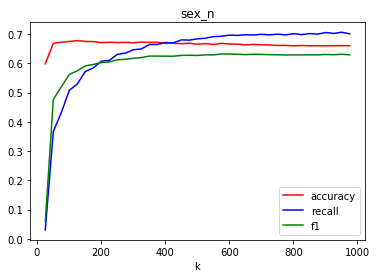

In [1044]:
#try to predict sex from essay words
x_cols=['all_essays']
y_col='sex_n'
classify(df,x_cols,y_col,'nb',vectorizer='count')
classify(df,x_cols,y_col,'knn',k=range(26,1001,25),vectorizer='tfid')


In [1045]:
#best performance of knn appears to be achieved around k=700
x_cols=['all_essays']
y_col='sex_n'
classify(df,x_cols,y_col,'knn',k=700,vectorizer='tfid')



data        all_essays
attributes: 133169
target:     sex_n
samples:    57339
model:      knn k=700
prevalence:        0.4051
accuracy:          0.6639
balanced accuracy: 0.3376
precision:         0.5755
recall:            0.6961
f1-score:          0.6301
confusion matrix  :
[[4332 2421]
 [1433 3282]]
time:              173.45


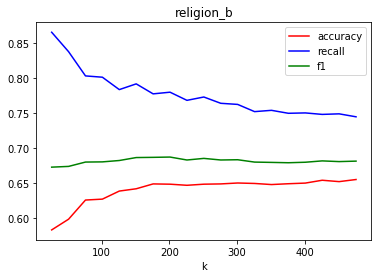

In [1046]:
#try to predict religiosity from essay words
x_cols=['all_essays']
y_col='religion_b'
classify(df,x_cols,y_col,'knn',k=range(26,501,25),vectorizer='tfid')


In [1047]:
x_cols=['all_essays']
y_col='religion_b'
classify(df,x_cols,y_col,'knn',k=180,vectorizer='tfid')
classify(df,x_cols,y_col,'nb',vectorizer='count')



data        all_essays
attributes: 114993
target:     religion_b
samples:    38181
model:      knn k=180
prevalence:        0.4969
accuracy:          0.6491
balanced accuracy: 0.3006
precision:         0.6153
recall:            0.7774
f1-score:          0.6869
confusion matrix  :
[[2017 1838]
 [ 842 2940]]
time:              105.41

data        all_essays
attributes: 114993
target:     religion_b
samples:    38181
model:      nb 
prevalence:        0.4969
accuracy:          0.6868
balanced accuracy: 0.3751
precision:         0.6574
recall:            0.7676
f1-score:          0.7082
confusion matrix  :
[[2342 1513]
 [ 879 2903]]
time:              36.01


In [1048]:
#usable numerical data
num_cols=['age','height',
 'sex_n','body_n','diet_n','drinks_n','drugs_n','user','smokes_n',
 'religion_n','pets_n','education_n','orientation_n','straight',
 'essay_len','watching','reading','religion_b','religion_b2',
 'nocollege']




data        drinks_n,smokes_n,pets_n
attributes: 3
target:     sex_n
samples:    37080
model:      svc 
prevalence:        0.4293
accuracy:          0.5979
balanced accuracy: 0.1392
precision:         0.5546
recall:            0.3593
f1-score:          0.4361
confusion matrix  :
[[3281  926]
 [2056 1153]]
time:              44.19

data        drinks_n,smokes_n,pets_n
attributes: 3
target:     sex_n
samples:    37080
model:      lr 
prevalence:        0.4293
accuracy:          0.5979
balanced accuracy: 0.1444
precision:         0.5511
recall:            0.3811
f1-score:          0.4506
confusion matrix  :
[[3211  996]
 [1986 1223]]
time:              0.16

data        drinks_n,smokes_n,pets_n
attributes: 3
target:     sex_n
samples:    37080
model:      knn k=25
prevalence:        0.4293
accuracy:          0.5677
balanced accuracy: 0.0295
precision:         0.5019
recall:            0.1212
f1-score:          0.1953
confusion matrix  :
[[3821  386]
 [2820  389]]
time:              1.59


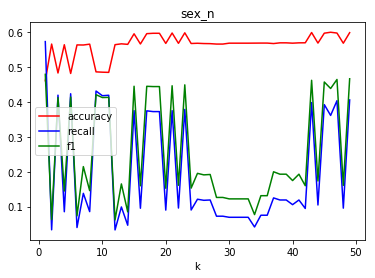


data        height
attributes: 1
target:     sex_n
samples:    59937
model:      lr 
prevalence:        0.4023
accuracy:          0.8302
balanced accuracy: 0.6524
precision:         0.7754
recall:            0.8067
f1-score:          0.7908
confusion matrix  :
[[6105 1114]
 [ 922 3847]]
time:              0.19


In [1063]:
#Try to predict sex
x_cols=[
#    'sex_n',
#    'height',
#    'age',
#    'body_n',
#    'diet_n',
    'drinks_n',
    'smokes_n',
#    'religion_n',
    'pets_n',
#    'education_n',
#    'orientation_n',
#    'essay_len',
#    'watching',
#    'reading',
       ]
y_col='sex_n'
classify(df,x_cols,y_col,'svc')
classify(df,x_cols,y_col,'lr')
classify(df,x_cols,y_col,'knn',k=25)
classify(df,x_cols,y_col,'knn',k=range(1,50))
#best predictor by itself...
x_cols=['height']
classify(df,x_cols,y_col,'lr')


data        sex_n,height,age,drinks_n,smokes_n,religion_n,pets_n,education_n
attributes: 8
target:     user
samples:    21302
model:      svc 
prevalence:        0.2098
accuracy:          0.8115
balanced accuracy: 0.2625
precision:         0.6141
recall:            0.3165
f1-score:          0.4177
confusion matrix  :
[[3170  181]
 [ 622  288]]
time:              19.26

data        sex_n,height,age,drinks_n,smokes_n,religion_n,pets_n,education_n
attributes: 8
target:     user
samples:    21302
model:      lr 
prevalence:        0.2098
accuracy:          0.8024
balanced accuracy: 0.1796
precision:         0.603
recall:            0.2187
f1-score:          0.321
confusion matrix  :
[[3220  131]
 [ 711  199]]
time:              0.12

data        sex_n,height,age,drinks_n,smokes_n,religion_n,pets_n,education_n
attributes: 8
target:     user
samples:    21302
model:      knn k=25
prevalence:        0.2098
accuracy:          0.8085
balanced accuracy: 0.2722
precision:         0.5911
recall: 

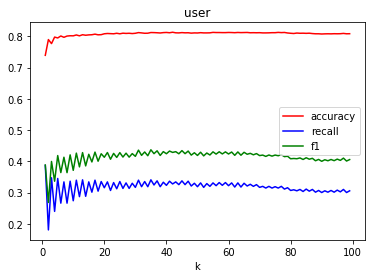

In [1050]:
#Try to predict drug use

x_cols=[
    'sex_n',
    'height',
    'age',
#    'body_n',
#    'diet_n',
    'drinks_n',
    'smokes_n',
    'religion_n',
    'pets_n',
    'education_n',
#    'orientation_n',
#    'essay_len',
#    'watching',
#    'reading',
       ]
y_col='user'
classify(df,x_cols,y_col,'svc')
classify(df,x_cols,y_col,'lr')
classify(df,x_cols,y_col,'knn')
classify(df,x_cols,y_col,'knn',k=range(1,100))



data        sex_n,age,diet_n,drinks_n,drugs_n,smokes_n,religion_n,pets_n,orientation_n,essay_len,watching,reading
attributes: 12
target:     nocollege
samples:    13860
model:      svc 
prevalence:        0.3001
accuracy:          0.763
balanced accuracy: 0.2954
precision:         0.7052
recall:            0.3598
f1-score:          0.4765
confusion matrix  :
[[1816  125]
 [ 532  299]]
time:              6.61

data        sex_n,age,diet_n,drinks_n,drugs_n,smokes_n,religion_n,pets_n,orientation_n,essay_len,watching,reading
attributes: 12
target:     nocollege
samples:    13860
model:      lr 
prevalence:        0.3001
accuracy:          0.7406
balanced accuracy: 0.2119
precision:         0.6667
recall:            0.2696
f1-score:          0.3839
confusion matrix  :
[[1829  112]
 [ 607  224]]
time:              0.1

data        sex_n,age,diet_n,drinks_n,drugs_n,smokes_n,religion_n,pets_n,orientation_n,essay_len,watching,reading
attributes: 12
target:     nocollege
samples:    13860
model

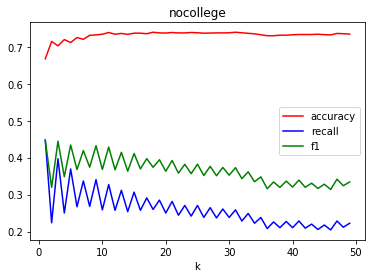

In [1051]:
#Try to predict education

x_cols=[
    'sex_n',
#    'height',
    'age',
#    'body_n',
    'diet_n',
    'drinks_n',
    'drugs_n',
    'smokes_n',
    'religion_n',
    'pets_n',
#    'education_n',
    'orientation_n',
    'essay_len',
    'watching',
    'reading',
       ]
y_col='nocollege'
classify(df,x_cols,y_col,'svc')
classify(df,x_cols,y_col,'lr')
classify(df,x_cols,y_col,'knn')
classify(df,x_cols,y_col,'knn',k=range(1,50))


data        sex_n,age,diet_n,drugs_n,smokes_n,religion_n,pets_n,orientation_n,essay_len,watching,reading
attributes: 11
target:     education_n
samples:    13919
model:      lr 
r2:                0.1209
time:              0.04


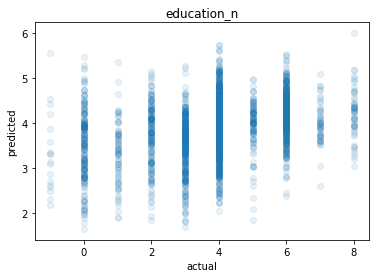


data        sex_n,age,diet_n,drugs_n,smokes_n,religion_n,pets_n,orientation_n,essay_len,watching,reading
attributes: 11
target:     education_n
samples:    13919
model:      svc 
r2:                0.0403
time:              17.54


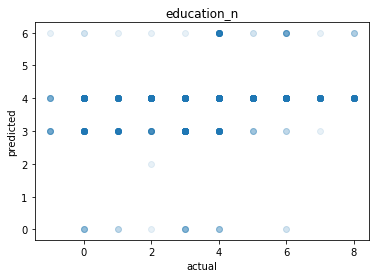


data        sex_n,age,diet_n,drugs_n,smokes_n,religion_n,pets_n,orientation_n,essay_len,watching,reading
attributes: 11
target:     education_n
samples:    13919
model:      knn k=25
r2:                -0.0101
time:              0.6


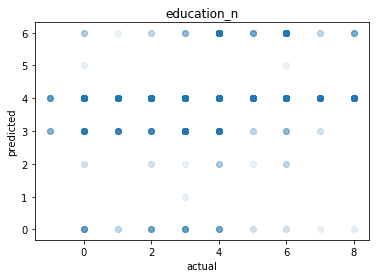

In [1052]:
#straight lr
x_cols=[
    'sex_n',
#    'height',
    'age',
#    'body_n',
    'diet_n',
#    'drinks_n',
    'drugs_n',
    'smokes_n',
    'religion_n',
    'pets_n',
#    'education_n',
    'orientation_n',
    'essay_len',
    'watching',
    'reading',
       ]
y_col='education_n'
classify(df,x_cols,y_col,'lr',binry=False,showscatter=True)
classify(df,x_cols,y_col,'svc',binry=False,showscatter=True)
classify(df,x_cols,y_col,'knn',k=25, binry=False,showscatter=True)



data        sex_n,age,diet_n,drinks_n,drugs_n,smokes_n,pets_n,education_n,orientation_n
attributes: 9
target:     religion_b
samples:    14403
model:      svc 
prevalence:        0.4926
accuracy:          0.6102
balanced accuracy: 0.2195
precision:         0.6128
recall:            0.5727
f1-score:          0.5921
confusion matrix  :
[[943 515]
 [608 815]]
time:              10.7

data        sex_n,age,diet_n,drinks_n,drugs_n,smokes_n,pets_n,education_n,orientation_n
attributes: 9
target:     religion_b
samples:    14403
model:      lr 
prevalence:        0.4926
accuracy:          0.6102
balanced accuracy: 0.2202
precision:         0.6061
recall:            0.6022
f1-score:          0.6042
confusion matrix  :
[[901 557]
 [566 857]]
time:              0.11

data        sex_n,age,diet_n,drinks_n,drugs_n,smokes_n,pets_n,education_n,orientation_n
attributes: 9
target:     religion_b
samples:    14403
model:      knn k=25
prevalence:        0.4926
accuracy:          0.596
balanced accuracy

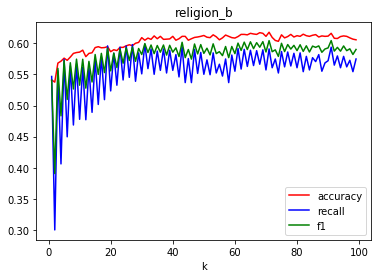


data        sex_n,age,diet_n,drinks_n,drugs_n,smokes_n,pets_n,education_n,orientation_n
attributes: 9
target:     religion_b2
samples:    14403
model:      svc 
prevalence:        0.2575
accuracy:          0.7411
balanced accuracy: -0.0037
precision:         0.0
recall:            0.0
f1-score:          0.0
confusion matrix  :
[[2135    8]
 [ 738    0]]
time:              10.23


In [1053]:
#Try to predict religiosity

x_cols=[
    'sex_n',
#    'height',
    'age',
#    'body_n',
    'diet_n',
    'drinks_n',
    'drugs_n',
    'smokes_n',
#    'religion_n',
    'pets_n',
    'education_n',
    'orientation_n',
#    'essay_len',
#    'watching',
#    'reading',
       ]
y_col='religion_b'
classify(df,x_cols,y_col,'svc')
classify(df,x_cols,y_col,'lr')
classify(df,x_cols,y_col,'knn')
classify(df,x_cols,y_col,'knn',k=range(1,100))
y_col='religion_b2'
classify(df,x_cols,y_col,'svc')


In [1054]:
#Try to predict non-straight
#APPEARS COMPLETELY RANDOM

x_cols=[
    'sex_n',
#    'height',
#    'age',
#    'body_n',
#    'diet_n',
    'drinks_n',
    'drugs_n',
#    'smokes_n',
#    'religion_n',
#    'pets_n',
    'education_n',
#    'orientation_n',
#    'essay_len',
#    'watching',
#    'reading',
       ]
y_col='nostraight'
classify(df,x_cols,y_col,'svc')
classify(df,x_cols,y_col,'lr')
classify(df,x_cols,y_col,'knn')
#classify(df,x_cols,y_col,'knn',k=range(1,100))



data        sex_n,drinks_n,drugs_n,education_n
attributes: 4
target:     nostraight
samples:    40061
model:      svc 
prevalence:        0.1377
accuracy:          0.8615
balanced accuracy: 0.0006
precision:         0.3333
recall:            0.0009
f1-score:          0.0018
confusion matrix  :
[[6902    2]
 [1108    1]]
time:              20.55

data        sex_n,drinks_n,drugs_n,education_n
attributes: 4
target:     nostraight
samples:    40061
model:      lr 
prevalence:        0.1377
accuracy:          0.8616
balanced accuracy: 0.0
precision:         0.0
recall:            0.0
f1-score:          0.0
confusion matrix  :


/home/mehatamm/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mehatamm/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[6904    0]
 [1109    0]]
time:              0.18

data        sex_n,drinks_n,drugs_n,education_n
attributes: 4
target:     nostraight
samples:    40061
model:      knn k=25
prevalence:        0.1377
accuracy:          0.8581
balanced accuracy: 0.0118
precision:         0.3
recall:            0.0189
f1-score:          0.0356
confusion matrix  :
[[6855   49]
 [1088   21]]
time:              1.56


In [1055]:
#print(df.groupby('height').income.mean())